In [1]:
import numpy as np
import cv2 as cv
import time 
import matplotlib.pyplot as plt 

In [2]:
path = ""

## Load an image with cv2

In [25]:
image = cv.imread(path+"Photos/cat.jpg")

In [4]:
def imshow(image, title=""):
    # Matplotlib funciona con RGB, mientras que OpenCV trabaja con BGR.
    img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.show()

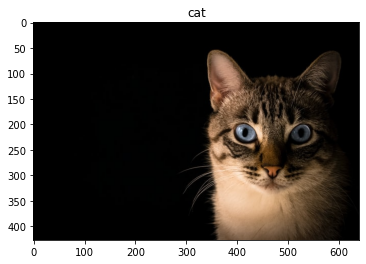

In [5]:
imshow(image, "cat")

In [6]:
def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    
    dimensions = (width, height)
    
    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

In [7]:
def changeRes(width, height):
    # Live video
    cv.set(3,width)
    cv.set(4,height)

## Show a video with cv2 (outside the jupyter.notebook)

In [8]:
capture = cv.VideoCapture(path+"Videos/dog.mp4")

while True:
    ret, frame = capture.read()
    
    if not ret: break
    
    cv.imshow("Video", rescaleFrame(frame, 0.5))
    
    if cv.waitKey(1) & 0xFF == ord("q"): break
        
capture.release()
cv.destroyAllWindows()

## Play with an image

 - Blur
 - Threshold
 - Rectangles

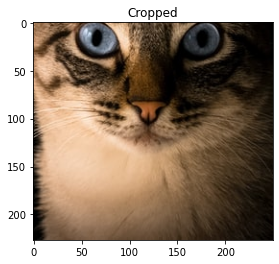

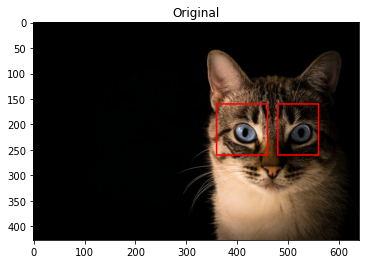

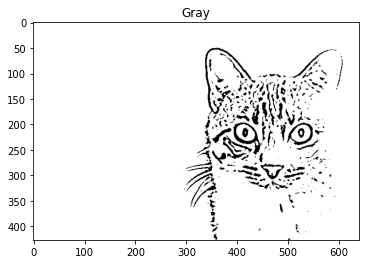

In [10]:
scale = 1
image = cv.imread(path+"Photos/cat.jpg")
image = rescaleFrame(image, scale)

# blur and gray the image
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (5,5),0)
gray = cv.medianBlur(gray, 5)
gray = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,3.5)

# cropped an image
cropped = image[200:800,350:600]
imshow(cropped, "Cropped")

# rectangles
cv.rectangle(image,(int(scale*360),int(scale*160)),(int(scale*460),int(scale*260)),(0,0,255), thickness=2)
cv.rectangle(image,(int(scale*480),int(scale*160)),(int(scale*560),int(scale*260)),(0,0,255), thickness=2)

# imshow
imshow(image, "Original")
imshow(gray, "Gray")

# # default
# cv.waitKey(0)
# cv.destroyAllWindows()

# Traslations

In [11]:
def translate(image,x,y):
    transImg = np.zeros(image.shape, dtype=np.uint8)
    transImg[y:,x:] = image[:image.shape[0]-y,:image.shape[1]-x]
    return transImg

In [12]:
def translate2(image,x,y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dims = (image.shape[1], image.shape[0])
    return cv.warpAffine(image, transMat, dims)

In [13]:
def rotate(image, angle, rotPoint=None):
    (height, width) = image.shape[:2]
    
    if rotPoint == None: rotPoint = (width//2, height//2)
        
    dims = (width, height)
        
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    return cv.warpAffine(image, rotMat, dims)

In [16]:
def halfImage(image):
    return image[::2,::2]

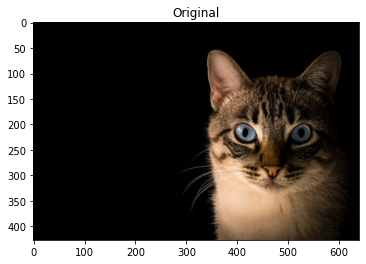

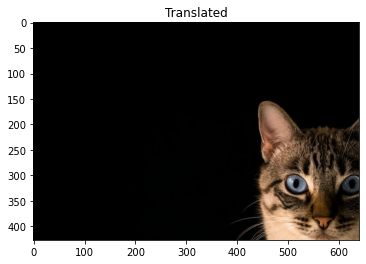

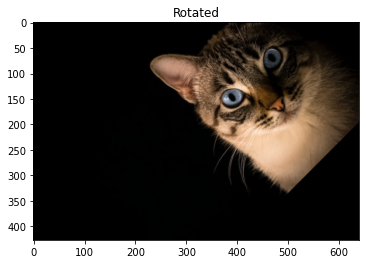

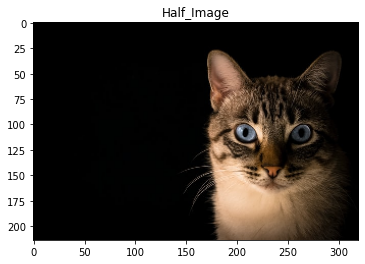

In [26]:
imshow(image, "Original")
imshow(translate(image,100,100), "Translated")
imshow(rotate(image,45), "Rotated")
imshow(halfImage(image), "Half_Image")

# cv.waitKey(0)
# cv.destroyAllWindows()

# Change of Colors 

In [18]:
image = image[30:,270:]

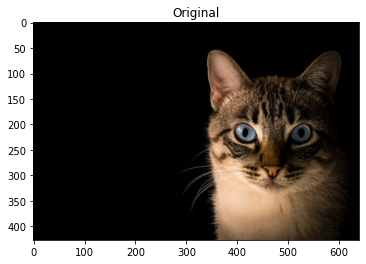

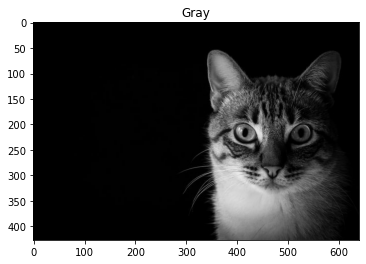

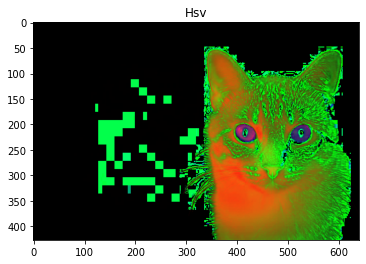

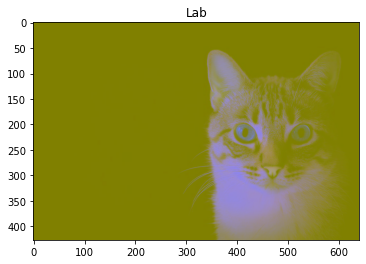

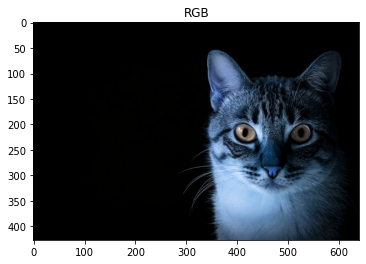

In [27]:
imshow(image, "Original")

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
imshow(gray, "Gray")

hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
imshow(hsv, "Hsv")

lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)
imshow(lab, "Lab")

rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
imshow(rgb, "RGB")

# cv.waitKey(0)
# cv.destroyAllWindows()

# Split Merge

In [29]:
b = image[:,:,0]
g = image[:,:,1]
r = image[:,:,2]

In [30]:
b,g,r = cv.split(image)

In [31]:
blank = np.zeros(image.shape[:2], dtype=np.uint8)

In [32]:
blue = cv.merge([b,blank,blank])
green = cv.merge([blank,g,blank])
red = cv.merge([blank,blank,r])

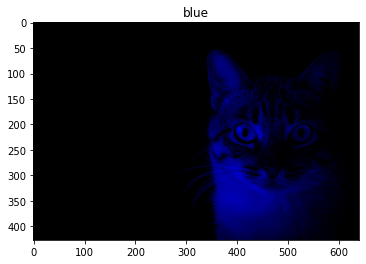

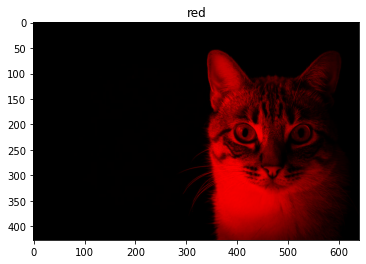

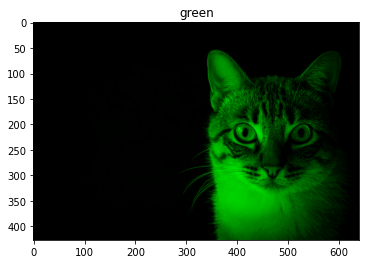

In [33]:
imshow(blue, "blue")
imshow(red, "red")
imshow(green, "green")


# cv.waitKey(0)
# cv.destroyAllWindows()